# Avaliando Modelo de Classificação

* Utilizando uma base do Excel: "BaseInadimplencia.xlsx" com duas páginas:
    - **treino**: dados de treino
    - **teste**: dados de teste

### Importando e visualizando a base

In [32]:
import pandas as pd

treino = pd.read_excel("BaseInadimplencia.xlsx", sheet_name='treino')
teste = pd.read_excel("BaseInadimplencia.xlsx", sheet_name='teste')

In [33]:
treino.head(5)

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-3.910816,-0.874096,0
2,-2.745822,-2.250098,0
3,-1.352205,-1.280924,0
4,-0.596639,-2.932358,0


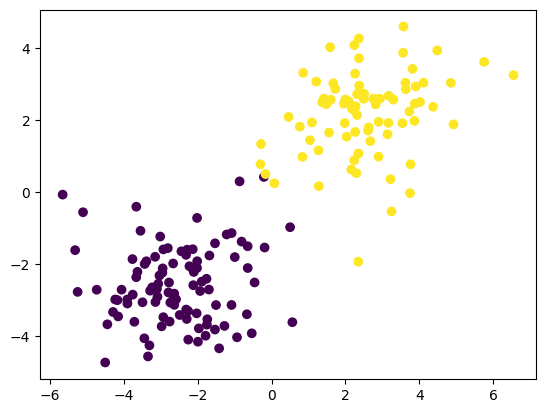

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(teste.SaldoConta, teste.SaldoInvestimento, c=teste.Situacao)

plt.show()

### Criando dois modelos de classificação

1. Regressão Logística
2. Árvore de decisão

* Treinar os dois modelos com os dados de treino e aplicar aos dados de teste

In [35]:
# Dados de treino
X_treino = treino.drop('Situacao', axis=1)
y_treino = treino.Situacao

# Dados de teste
X_teste = teste.drop('Situacao', axis=1)
y_teste = teste.Situacao


* Regressão Logística

In [36]:
from sklearn.linear_model import LogisticRegression

clfLR = LogisticRegression(random_state=0).fit(X_treino, y_treino)

treino['y_RegLog'] = clfLR.predict(X_treino)

teste['y_RegLog'] = clfLR.predict(X_teste)

In [37]:
treino.head(3)

,SaldoConta,SaldoInvestimento,Situacao,y_RegLog
0,-1.365390,-3.280278,0,0
1,-3.910816,-0.874096,0,0
2,-2.745822,-2.250098,0,0


* Árvore de Decisão

In [38]:
from sklearn.tree import DecisionTreeClassifier

clfDT = DecisionTreeClassifier(random_state=0).fit(X_treino, y_treino)

treino['y_Arvore'] = clfDT.predict(X_treino)

teste['y_Arvore'] = clfDT.predict(X_teste)

In [39]:
treino.head(3)

,SaldoConta,SaldoInvestimento,Situacao,y_RegLog,y_Arvore
0,-1.365390,-3.280278,0,0,0
1,-3.910816,-0.874096,0,0,0
2,-2.745822,-2.250098,0,0,0


## Avaliando os modelos criados

### Matriz de Confusão

<p align="center">
    <img src="confusion-matrix.webp">
</p>

In [29]:
from sklearn.metrics import confusion_matrix

* Regressão Logística

In [49]:
confusion_matrix(teste.Situacao, teste.y_RegLog, labels=[1,0])

array([[79,  0],
       [ 1, 98]], dtype=int64)

* Como temos apenas duas classes (0 ou 1), basicamente nosso modelo previu que 98 dados são da classe 0 (Verdadeiro Negativo), 79 dados são da classe 1 (Verdadeiro Positivo: ele negou 0 e classificou 1). Porém, classificou errado apenas um valor, ele previu que seria 1 (Positivo), mas na verdade é 0 (Negativo), classificando portanto como Falso Positivo.

* Considerando 0 (Positivo) e 1 (Negativo):
    - Valor real 0 (+) e o modelo previu 0 (+) = VP
    - Valor real 0 (+) e o modelo previu 1 (-) = FN
    - Valor real 1 (-) e o modelo previu 0 (+) = FP
    - Valor real 1 (-) e o modelo previu 1 (-) = VN

* Árvore de Decisão

In [50]:
confusion_matrix(teste.Situacao, teste.y_Arvore, labels=[1,0])

array([[78,  1],
       [ 2, 97]], dtype=int64)

* Como temos apenas duas classes (0 ou 1), basicamente nosso modelo previu que 97 dados são da classe 0 (Verdadeiro Negativo), 78 dados são da classe 1 (Verdadeiro Positivo: ele negou 0 e classificou 1). Porém, classificou errado: ele previu que seria 1 (Positivo), mas na verdade é 0 (Negativo) e classificou 2 pontos como 0 (Negativo), mas na verdade são 1 (Positivo) 

* Considerando 0 (Positivo) e 1 (Negativo):
    - Valor real 0 (+) e o modelo previu 0 (+) = VP
    - Valor real 0 (+) e o modelo previu 1 (-) = FN
    - Valor real 1 (-) e o modelo previu 0 (+) = FP
    - Valor real 1 (-) e o modelo previu 1 (-) = VN

### Acurácia

$$Ac = \frac{(VP + VN)}{(VP + VN + FP + FN)}$$

* Regressão Logística

In [42]:
(98+79)/(98+79+0+1)

0.9943820224719101

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(teste.Situacao, teste.y_RegLog)

0.9943820224719101

* Árvore de Decisão

In [45]:
(97+78)/(97+78+1+2)

0.9831460674157303

In [46]:
accuracy_score(teste.Situacao, teste.y_Arvore)

0.9831460674157303

### Precisão

* Dos valores previstos como **positivos**, quantos foram acertados pelo modelo:

$$P = \frac{VP}{(VP + FP)}$$

* Regressão Logística

In [51]:
79 / (79 + 1)

0.9875

In [48]:
from sklearn.metrics import precision_score

precision_score(teste.Situacao, teste.y_RegLog)

0.9875

* Árvore de Decisão

In [52]:
78 / (78 + 2)

0.975

In [53]:
precision_score(teste.Situacao, teste.y_Arvore)

0.975

#### Recall

* Dos valores previstos como **positivos**, quantos foram acertados pelo modelo:

$$R = \frac{VP}{(VP + FN)}$$

- Estamos olhando os **positivos**

In [54]:
(79)/(79+0)

1.0

In [55]:
from sklearn.metrics import recall_score

recall_score(teste.Situacao, teste.y_RegLog)

1.0

In [58]:
(78) / (78+1)

0.9873417721518988

In [57]:
recall_score(teste.Situacao, teste.y_Arvore)

0.9873417721518988